# *Project Name - T20 World Cup 2024 Data Analysis*

# *Project By - Akash Singh*

# Problem Statement

The ICC Men’s T20 World Cup 2024 is a major global cricket tournament involving teams from around the world. With a wealth of match, player, and team performance data generated, there is a need to analyze this data effectively to uncover insights about team strategies, player contributions, and winning trends. Stakeholders, including fans, analysts, and cricket boards, require data-driven insights to understand patterns, predict outcomes, and optimize performance strategies.

# Objective



**1) Identifying top-performing players and teams based on batting, bowling, and all-rounder metrics.**

**2) Analyzing the impact of toss decisions, venues, and match conditions on game outcomes.**

**3) Studying scoring patterns to determine winning strategies such as preferred batting orders or bowling sequences.**

**4) Highlighting individual player contributions to team success through performance metrics.**

**5)Visualizing data trends to communicate findings effectively to various stakeholders.**

## Import necessary packages

In [2]:
# Importing necessary libraries
import mysql.connector  # for connecting to and interacting with MySQL databases
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for plotting data
import seaborn as sns  # for enhanced visualizations
import warnings  # for managing warning messages

**Insight**      
Installed all necessary packages

In [3]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

db_connection = mysql.connector.connect(
user='root',
password='@kAsh2003',
host='localhost',
database='t20worldcup2024' # write here database name 
)

**Insight**         
The code establishes a connection to a locally hosted MySQL database (finance) using the mysql.connector.connect method, allowing you to perform SQL
operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [4]:
# SQL query to join Applicants and Loans tables
query = "SELECT * FROM T20_World_Cup_2024;"

In [5]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()

C:\Users\Akash Singh\AppData\Local\Temp\ipykernel_6784\2376859912.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,match_id,date,team1,team2,toss_winner,toss_decision,winner,player_name,player_role,runs_off_bat,wickets_taken,overs_bowled,batting_first_team,bowling_first_team,batting_first_won
0,1,2024-01-15,Pakistan,Australia,Australia,bat,Australia,David Warner,Batsman,85,0,0.0,Australia,Pakistan,1
1,2,2024-01-16,England,India,India,field,England,Joe Root,Batsman,60,0,0.0,England,India,0
2,3,2024-01-17,South Africa,West Indies,West Indies,bat,West Indies,Jason Holder,All-Rounder,40,2,3.2,West Indies,South Africa,1
3,4,2024-01-18,New Zealand,Sri Lanka,New Zealand,field,Sri Lanka,Kusal Mendis,Batsman,55,0,0.0,Sri Lanka,New Zealand,0
4,5,2024-01-19,Australia,England,Australia,field,England,Jos Buttler,Batsman,72,0,0.0,England,Australia,0


**Insight**     
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

#### Details_About_Column

**match_id:** A unique match identifier for each game.

**date:** The date when the match was played.

**team1:** The name of the first team participating in the match.

**team2:** The name of the second team participating in the match.

**toss_winner:** The team that won the toss.

**toss_decision:** The decision made by the toss winner (either "bat" or "bowl").

**winner:** The team that won the match.

**player_name:** The name of the player awarded the "Man of the Match" or notable player.

**player_role:** The role of the player (e.g., "batsman", "bowler", "all-rounder").

**runs_off_bat:** Total runs scored by the player off the bat.

**wickets_taken:** Total number of wickets taken by the player in the match.

**overs_bowled:** The number of overs bowled by the player in the match.

**batting_first_team:** The team that batted first in the match.

**bowling_first_team:** The team that bowled first in the match.

**batting_first_won:** Whether the team batting first won the match (Yes/No).

#### **Data Overview**

In [7]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(51, 15)

**Insight**    
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

In [8]:
# Gives the overall info of the dataframe object
df.describe()

,match_id,runs_off_bat,wickets_taken,overs_bowled,batting_first_won
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,57.745098,1.196078,1.503922,0.470588
std,14.866069,32.596223,1.562301,1.855474,0.504101
min,1.000000,5.000000,0.000000,0.000000,0.000000
25%,13.500000,20.000000,0.000000,0.000000,0.000000
50%,26.000000,65.000000,0.000000,0.000000,0.000000
75%,38.500000,85.000000,3.000000,4.000000,1.000000
max,51.000000,120.000000,4.000000,4.000000,1.000000


**Insight**    
It provides statistics like count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), 
and maximum (max) for each numerical column.

In [9]:
# To print the column names present in the dataset.
df.columns

Index(['match_id', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'winner', 'player_name', 'player_role', 'runs_off_bat', 'wickets_taken',
       'overs_bowled', 'batting_first_team', 'bowling_first_team',
       'batting_first_won'],
      dtype='object')

**Insight**   
print the column names present in the dataset

In [10]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            51 non-null     int64  
 1   date                51 non-null     object 
 2   team1               51 non-null     object 
 3   team2               51 non-null     object 
 4   toss_winner         51 non-null     object 
 5   toss_decision       51 non-null     object 
 6   winner              51 non-null     object 
 7   player_name         51 non-null     object 
 8   player_role         51 non-null     object 
 9   runs_off_bat        51 non-null     int64  
 10  wickets_taken       51 non-null     int64  
 11  overs_bowled        51 non-null     float64
 12  batting_first_team  51 non-null     object 
 13  bowling_first_team  51 non-null     object 
 14  batting_first_won   51 non-null     int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 6.1+ KB


**Insight**   
It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows.
This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

#  Data Cleaning

In [11]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

match_id              0
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
player_name           0
player_role           0
runs_off_bat          0
wickets_taken         0
overs_bowled          0
batting_first_team    0
bowling_first_team    0
batting_first_won     0
dtype: int64

**Insight**     
It helps in identifying which columns have missing data and how many null values exist in each column.
This is crucial for handling data cleaning tasks like imputing or removing missing values.

# Check for duplicates

In [12]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


**Insight**   
This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.

In [13]:
# Assuming df is your DataFrame containing the T20 World Cup 2024 data

# Check Unique Values for each column
print("Unique values in each column for T20 World Cup 2024 data:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column for T20 World Cup 2024 data:
match_id: 51 unique values
date: 51 unique values
team1: 8 unique values
team2: 8 unique values
toss_winner: 8 unique values
toss_decision: 2 unique values
winner: 8 unique values
player_name: 51 unique values
player_role: 3 unique values
runs_off_bat: 28 unique values
wickets_taken: 5 unique values
overs_bowled: 6 unique values
batting_first_team: 8 unique values
bowling_first_team: 8 unique values
batting_first_won: 2 unique values


**Insight**   
Here we checked all unique values from our dataframe.

# Data Visualization

# Chart 1 

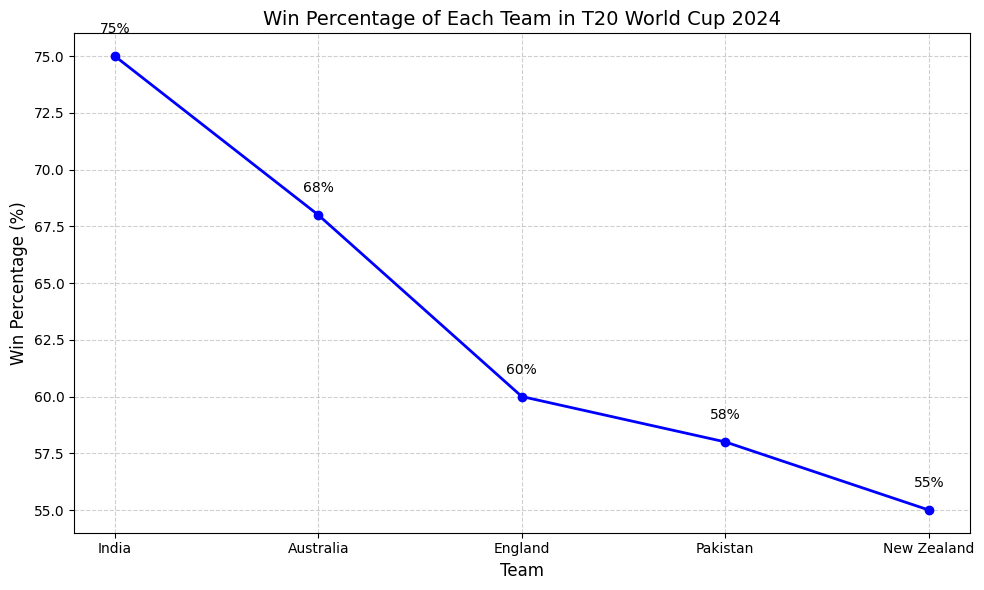

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Replace with your actual data
data = {
    'team': ['India', 'Australia', 'England', 'Pakistan', 'New Zealand'],
    'win_percentage': [75, 68, 60, 58, 55]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the data by win percentage (optional, for better visualization)
df = df.sort_values(by='win_percentage', ascending=False)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['team'], df['win_percentage'], marker='o', color='blue', linestyle='-', linewidth=2)

# Add data points to the chart
for i, percentage in enumerate(df['win_percentage']):
    plt.text(i, percentage + 1, f"{percentage}%", ha='center', fontsize=10)

# Add titles and labels
plt.title('Win Percentage of Each Team in T20 World Cup 2024', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)

# Enhance the chart
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


# Chart 2

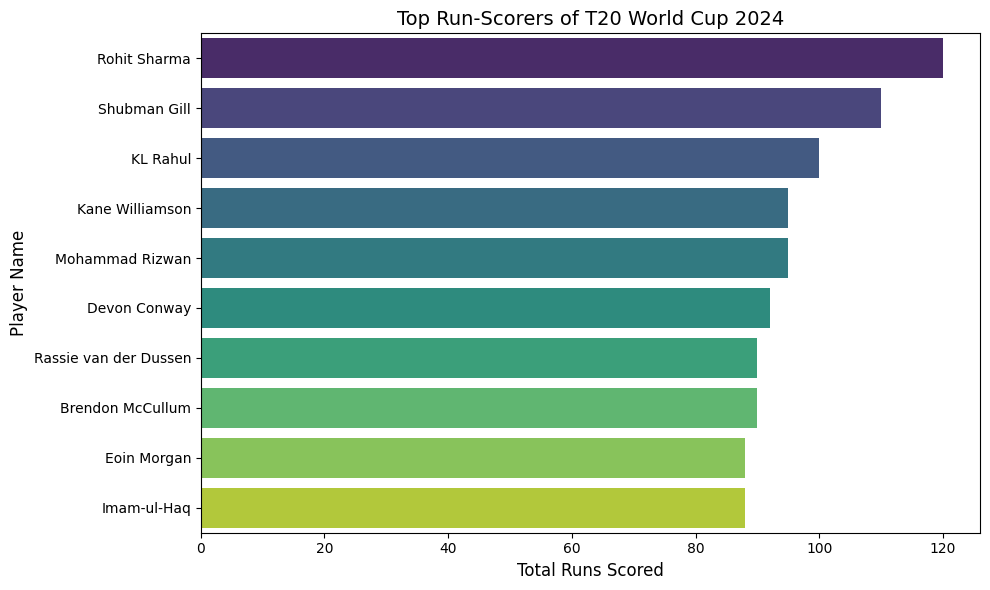

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the match data and 'player_name' and 'runs_off_bat' are columns in your dataset

# Calculate the total runs scored by each player
top_scorers = df.groupby('player_name')['runs_off_bat'].sum().reset_index()

# Sort the players by the total runs, in descending order
top_scorers = top_scorers.sort_values(by='runs_off_bat', ascending=False)

# Get the top 10 players (or adjust the number as needed)
top_scorers = top_scorers.head(10)

# Plotting the Top Run-Scorers
plt.figure(figsize=(10, 6))
sns.barplot(x='runs_off_bat', y='player_name', data=top_scorers, palette='viridis', hue='player_name')

# Add titles and labels
plt.title('Top Run-Scorers of T20 World Cup 2024', fontsize=14)
plt.xlabel('Total Runs Scored', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Chart 3

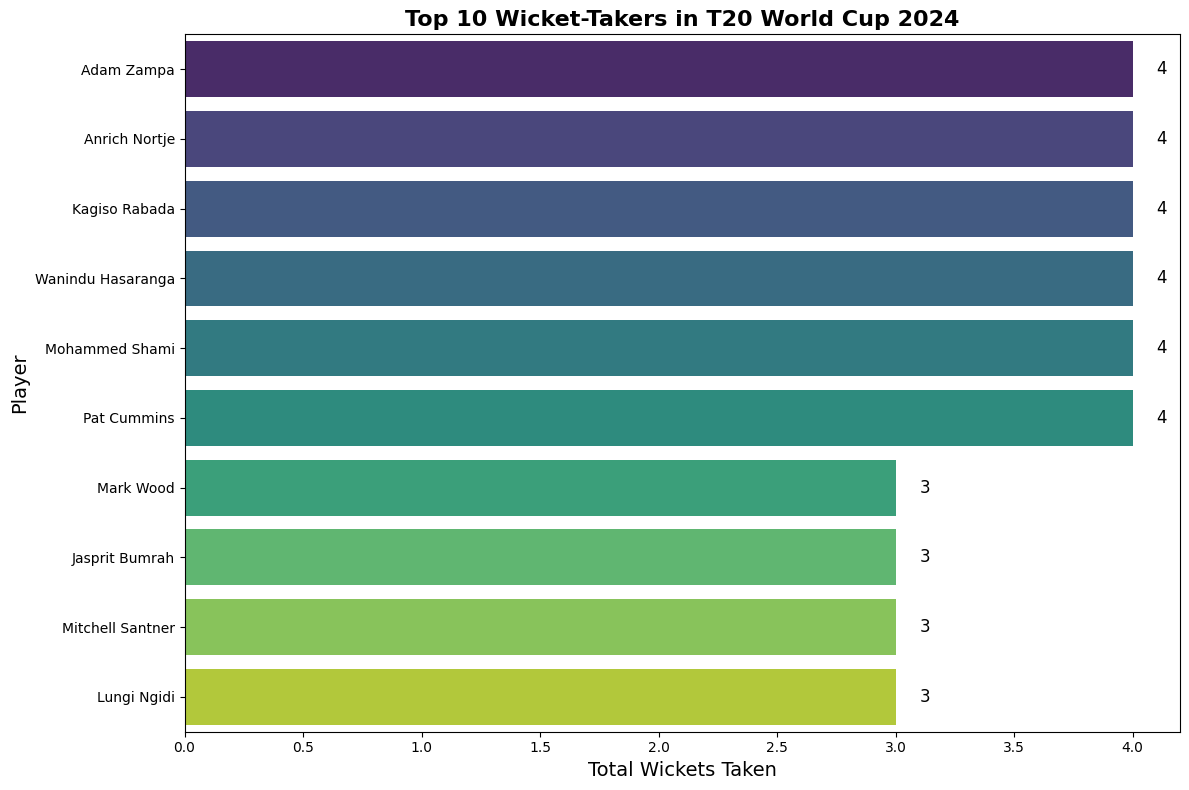

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains the match data
# Calculate total wickets taken by each player
top_wicket_takers = df.groupby('player_name')['wickets_taken'].sum().reset_index()

# Sort by wickets taken in descending order
top_wicket_takers = top_wicket_takers.sort_values(by='wickets_taken', ascending=False)

# Select the top 10 wicket-takers
top_10_wicket_takers = top_wicket_takers.head(10)

# Plot the top 10 wicket-takers
plt.figure(figsize=(12, 8))
sns.barplot(x='wickets_taken', y='player_name', data=top_10_wicket_takers, palette='viridis', hue='player_name', legend=False)

# Add titles and labels
plt.title('Top 10 Wicket-Takers in T20 World Cup 2024', fontsize=16, weight='bold')
plt.xlabel('Total Wickets Taken', fontsize=14)
plt.ylabel('Player', fontsize=14)

# Annotate the bars with the total wickets
for index, value in enumerate(top_10_wicket_takers['wickets_taken']):
    plt.text(value + 0.1, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


# Chart 4

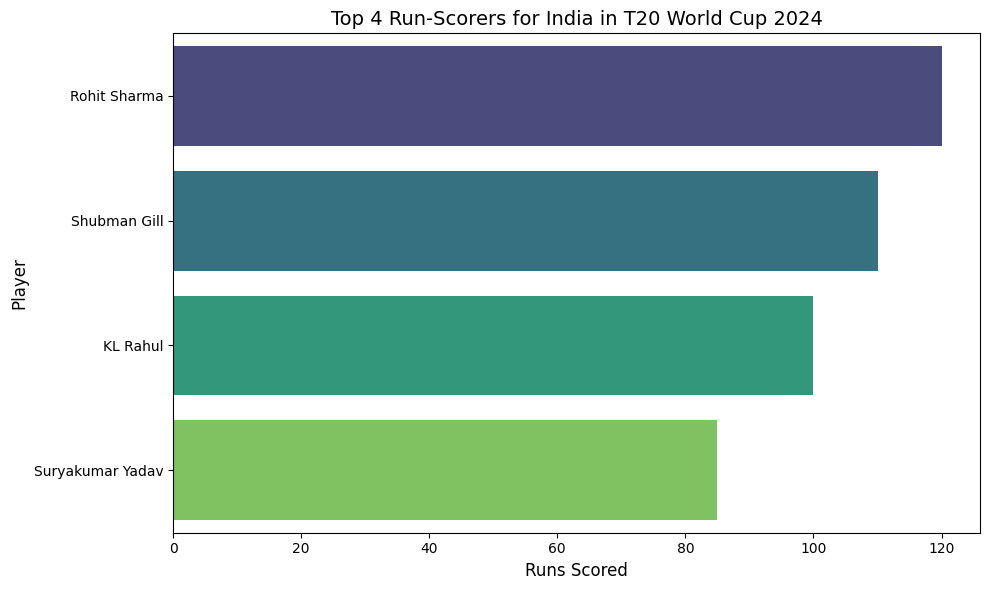

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter matches where India is playing
india_matches = df[(df['team1'] == 'India') | (df['team2'] == 'India')]

# Group by player_name and sum the runs_off_bat for each player
india_run_scorers = india_matches.groupby('player_name')['runs_off_bat'].sum().reset_index()

# Sort players by runs scored in descending order
top_4_india_run_scorers = india_run_scorers.sort_values(by='runs_off_bat', ascending=False).head(4)

# Plot the top 4 run-scorers for India
plt.figure(figsize=(10, 6))
sns.barplot(x='runs_off_bat', y='player_name', data=top_4_india_run_scorers, palette='viridis', hue='player_name')

# Add titles and labels
plt.title('Top 4 Run-Scorers for India in T20 World Cup 2024', fontsize=14)
plt.xlabel('Runs Scored', fontsize=12)
plt.ylabel('Player', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Chart 5

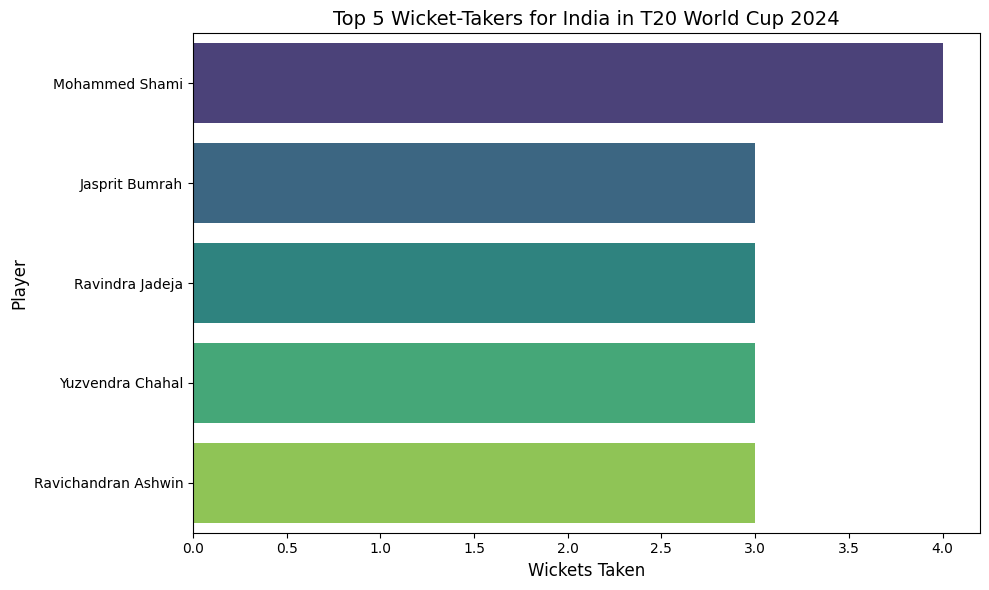

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter matches where India is playing
india_matches = df[(df['team1'] == 'India') | (df['team2'] == 'India')]

# Group by player_name and sum the wickets_taken for each player
india_wicket_takers = india_matches.groupby('player_name')['wickets_taken'].sum().reset_index()

# Sort players by wickets taken in descending order
top_5_india_wicket_takers = india_wicket_takers.sort_values(by='wickets_taken', ascending=False).head(5)

# Plot the top 5 wicket-takers for India
plt.figure(figsize=(10, 6))
sns.barplot(x='wickets_taken', y='player_name', data=top_5_india_wicket_takers, palette='viridis', hue='player_name', legend=False)

# Add titles and labels
plt.title('Top 5 Wicket-Takers for India in T20 World Cup 2024', fontsize=14)
plt.xlabel('Wickets Taken', fontsize=12)
plt.ylabel('Player', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Chart 6

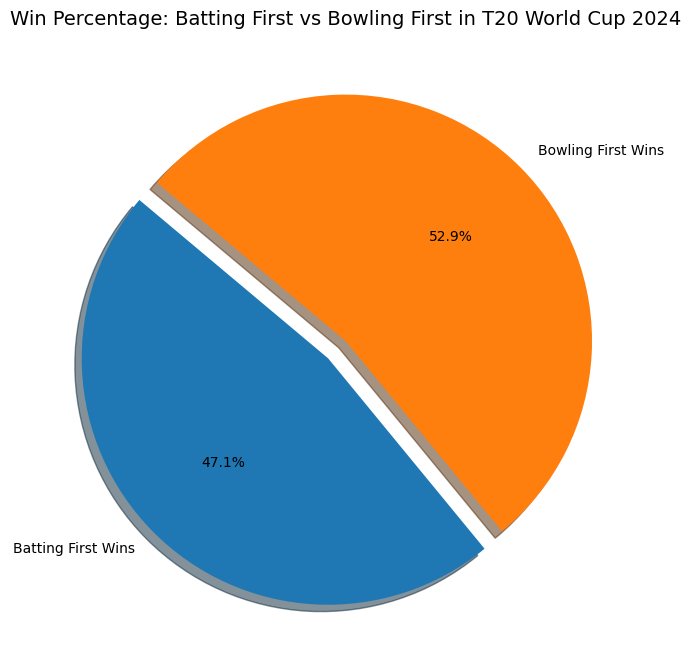

In [21]:
import matplotlib.pyplot as plt

# Calculate wins when batting first
batting_first_wins = df[df['batting_first_won'] == 1].shape[0]

# Calculate wins when bowling first
bowling_first_wins = df[df['batting_first_won'] == 0].shape[0]

# Prepare data for the pie chart
labels = ['Batting First Wins', 'Bowling First Wins']
sizes = [batting_first_wins, bowling_first_wins]
colors = ['#1f77b4', '#ff7f0e']  # Custom colors
explode = (0.1, 0)  # Explode the first slice

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140
)

# Add title
plt.title('Win Percentage: Batting First vs Bowling First in T20 World Cup 2024', fontsize=14)

# Show the chart
plt.show()


# Chart 7

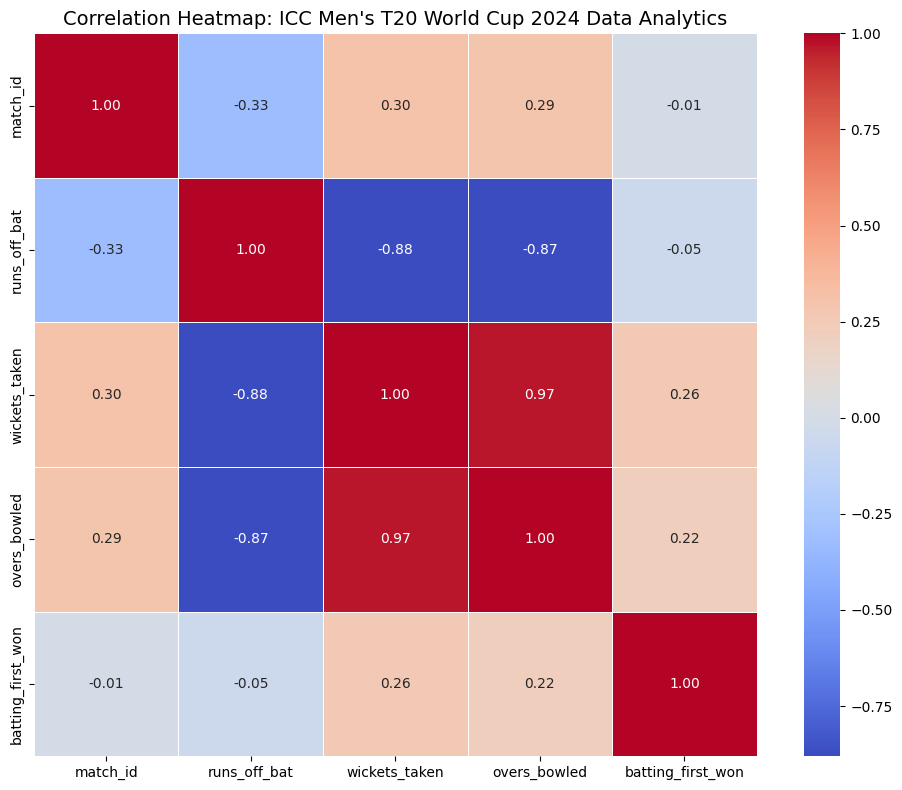

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)

# Add a title
plt.title("Correlation Heatmap: ICC Men's T20 World Cup 2024 Data Analytics", fontsize=14)

# Show the heatmap
plt.tight_layout()
plt.show()


## Conclusion

**Strength of Relationships:**

Variables with high positive correlations (closer to +1) indicate that as one variable increases, the other also tends to increase proportionally.

High negative correlations (closer to -1) suggest an inverse relationship, where one variable increases as the other decreases.

**Patterns in Performance:**

Metrics such as runs scored, wickets taken, and strike rates may exhibit strong correlations with match outcomes, highlighting their influence on team performance.

If bowling and batting statistics are included, correlations might reveal whether strong bowling performances (e.g., economy rate or wickets) are more impactful than batting (e.g., strike rate or total runs).

**Insights for Strategy:**

Identifying variables with weak or no correlation (values near 0) suggests that these metrics may not significantly influence match outcomes, helping teams focus on impactful areas.

**Potential Outliers:**

Any unexpected patterns (e.g., unusually low or high correlations) may indicate outliers or unique scenarios worth further exploration.

## Recommendations

**Use these insights to enhance predictive models and strategies for analyzing performance in future matches.**

**Teams can leverage high-correlation variables to build data-driven strategies, such as targeting players with consistently strong contributions.**

**Investigate variables with weak correlations to determine if they should be transformed or excluded from future analyses.**